In [72]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
from sklearn.datasets import load_boston
boston_data = load_boston()
print(boston_data['DESCR']) #opis tych danych (DESCRIPTION)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [74]:
d = boston_data['data']
d2 = d[:, [2,5]] #wyciągamy tylko 2 cechy: INDUS, RM
target = boston_data['target']

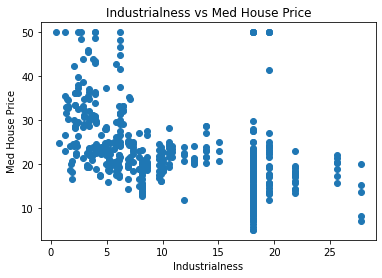

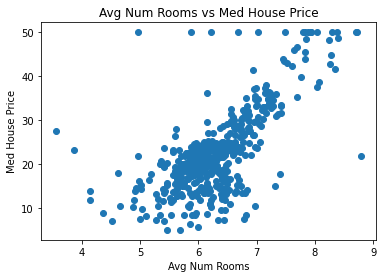

In [75]:
plt.title('Industrialness vs Med House Price')
plt.scatter(d2[:, 0], target)
plt.xlabel('Industrialness')
plt.ylabel('Med House Price')
plt.show()

plt.title('Avg Num Rooms vs Med House Price')
plt.scatter(d2[:, 1], target)
plt.xlabel('Avg Num Rooms')
plt.ylabel('Med House Price')
plt.show()

ZADANIE 1

In [76]:
def loss_function(w1, w2, w0, X, t):
    
    n = len(t)
    suma = 0
    for i in range (n):
        wzor = (w1 * (X[i][0]) + w2 * (X[i][1]) + w0 - t[i])**2
        suma += wzor
    wynik = 1/(2*(n)) * suma
    return wynik

In [77]:
#przykladowe wywolanie
loss_function(3, 8, -1, d2, target)


2088.9192750474317

ZADANIE 2

In [78]:
def update_weigths(w1, w2, w0, X, t, eta):
    
    n = len(t)
    
    suma_0 = 0 
    suma_1 = 0
    suma_2 = 0
    for i in range (n):
        wzor = w1 * (X[i][0]) + w2 * (X[i][1]) + w0 - t[i]
        suma_0 += wzor
        suma_1 += wzor * (X[i][0])
        suma_2 += wzor * (X[i][1])
        
    pochodna_w0 = 1/n*suma_0
    pochodna_w1 = 1/n*suma_1
    pochodna_w2 = 1/n*suma_2 
    
    w1new = w1 - eta*pochodna_w1
    w2new = w2 - eta*pochodna_w2
    w0new = w0 - eta*pochodna_w0

    return w1new, w2new, w0new

In [79]:
#przykladowe wywolanie
update_weigths(3, 8, -1, d2, target, 0.001)

(2.1737704910276685, 7.628145982577075, -1.060154604743083)

ZADANIE 3

In [80]:
#eta 0.001

LF = []

it = []
it = list(range(1,1001))

w1 = 1
w2 = 1
w0 = 1
for i in range (1000):
    new = update_weigths(w1, w2, w0, d2, target, 0.001)
    lf = loss_function(w1, w2, w0, d2, target)
    LF.append(lf)
    w1 = new[0]
    w2 = new[1]
    w0 = new[2]
    
print(w1,w2,w0)


-0.5240516597773193 4.3480921568559605 1.2535642605913597


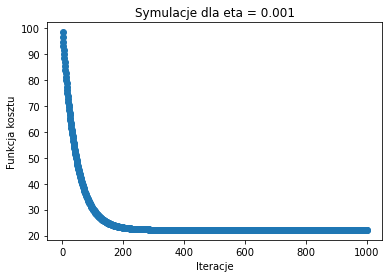

In [81]:
plt.title('Symulacje dla eta = 0.001')
plt.scatter(it, LF)
plt.xlabel('Iteracje')
plt.ylabel('Funkcja kosztu')
plt.show()

In [82]:
#eta 0.01


LF = []

w1 = 1
w2 = 1
w0 = 1
for i in range (1000):
    new = update_weigths(w1, w2, w0, d2, target, 0.01)
    lf = loss_function(w1, w2, w0, d2, target)
    LF.append(lf)
    w1 = new[0]
    w2 = new[1]
    w0 = new[2]
    
print(w1,w2,w0)

189.23801606437337 85.4860327498343 12.549821709958701


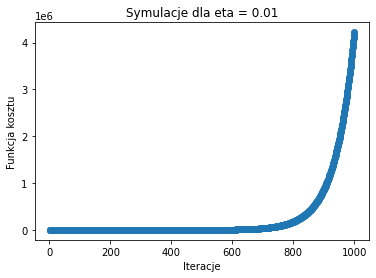

In [83]:
plt.title('Symulacje dla eta = 0.01')
plt.scatter(it, LF)
plt.xlabel('Iteracje')
plt.ylabel('Funkcja kosztu')
plt.show()

In [84]:
# eta 0.00001


LF = []

w1 = 1
w2 = 1
w0 = 1
for i in range (1000):
    new = update_weigths(w1, w2, w0, d2, target, 0.00001)
    lf = loss_function(w1, w2, w0, d2, target)
    LF.append(lf)
    w1 = new[0]
    w2 = new[1]
    w0 = new[2]
    
print(w1,w2,w0)

0.7876743224351483 1.3296083328779649 1.043574995600172


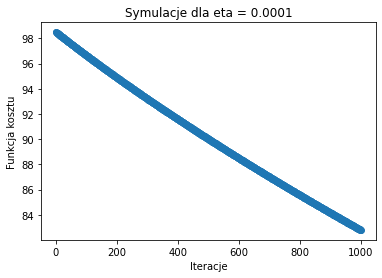

In [85]:
plt.title('Symulacje dla eta = 0.0001')
plt.scatter(it, LF)
plt.xlabel('Iteracje')
plt.ylabel('Funkcja kosztu')
plt.show()

ZADANIE 4

In [87]:
w1 = 1
w2 = 1
w0 = 1

Lf = []

it = []

it = list(range(1,1001))

for i in range (1000):
    new = update_weigths(w1, w2, w0, d2, target, 0.001)
    w1 = new[0]
    w2 = new[1]
    w0 = new[2]

    #ten kod nie jest roboczy, raczej proba zrobienia zadania
    for i in range (1000):
        if ((new[i+1][0] - new[i][0]) <= 0.001) and ((new[i+1][1] - new[i][1]) <= 0.001) and ((new[i+1][2] - new[i][2]) <= 0.001):
            print (i)
  
    #if ((w1[i+1] - w1[i]) <= 0.001) and ((w2[+1] - w2[i]) <= 0.001) and ((w0[i+1] - w0[i]) <= 0.001):
    #    print (i)
    

IndexError: invalid index to scalar variable.

ZADANIE 5

z zadania 3: w0 = 1.2535642605913597, w1 = -0.5240516597773193, w2 = 4.3480921568559605

z zadania 5: w0 = -22.898315729225065, w1 =  -0.33471389, w2 = 7.82205511

W przypadku parametrów w0, w1, w2 nie ma dużych podobienstw (parametry w1 są mniej więcej podobne, natomiast w0 różnią się drastycznie)

ZADANIE 6

In [88]:
# podział na zbiory walidacyjny, treningowy i testowy

d2_walid = d2[:303]
d2_tren = d2[304:405]
d2_test = d2[406:]

t_walid = target[:303]
t_tren = target[304:405]
t_test = target[406:]

In [89]:
#testujemy rozne eta

LF = []
w1 = 1
w2 = 1
w0 = 1
for i in range (1000):
    new = update_weigths(w1, w2, w0, d2_walid, t_walid, 0.001)
    lf = loss_function(w1, w2, w0, d2_walid, t_walid)
    LF.append(lf)
    w1 = new[0]
    w2 = new[1]
    w0 = new[2]
    
print(w1,w2,w0)
print(sum(LF)/len(LF))

LF = []
w1 = 1
w2 = 1
w0 = 1
for i in range (1000):
    new = update_weigths(w1, w2, w0, d2_walid, t_walid, 0.01)
    lf = loss_function(w1, w2, w0, d2_walid, t_walid)
    LF.append(lf)
    w1 = new[0]
    w2 = new[1]
    w0 = new[2]
    
print(w1,w2,w0)
print(sum(LF)/len(LF))



LF = []
w1 = 1
w2 = 1
w0 = 1
for i in range (1000):
    new = update_weigths(w1, w2, w0, d2_walid, t_walid, 0.0001)
    lf = loss_function(w1, w2, w0, d2_walid, t_walid)
    LF.append(lf)
    w1 = new[0]
    w2 = new[1]
    w0 = new[2]
    
print(w1,w2,w0)
print(sum(LF)/len(LF))

-0.43806578495613585 4.461777850975811 1.0805786613753983
20.409365755804483
-0.4102525395406561 4.949662276291204 -2.327693844865539
16.610203792942947
0.02005595571285882 3.548372966790141 1.3163134344623948
49.325284851677594


In [90]:
# testujemy parametry na zbiorze treningowym, eta=0.01 (najmniejsza wartosc funkcji kosztu)

LF = []
w1 = 1
w2 = 1
w0 = 1
for i in range (1000):
    new = update_weigths(w1, w2, w0, d2_tren, t_tren, 0.01)
    lf = loss_function(w1, w2, w0, d2_tren, t_tren)
    LF.append(lf)
    w1 = new[0]
    w2 = new[1]
    w0 = new[2]
    
print(w1,w2,w0)
print(sum(LF)/len(LF))

3.2150413910203936e+32 1.300609911769724e+32 2.186508710692892e+31
7.575988022627291e+64


In [91]:
#funkcja kosztu na zbiorze testowym

loss_function(w1, w2, w0, d2_test, t_test)

2.1572317799905318e+67